# Tutorial 999: sqs on the best 100 features backword

---

### Introduction

Hello, this notebook will show how to use sqs to perform further feature selection, as we found that most features are very highly correlated, therfore we would need to remove those using the tool that we mentioned above. 

In [1]:
print(1)

1


first, let us call the data

In [2]:
%store -r df_input_RG
%store -r y_RG
%store -r df_RG

In [3]:
y_RG = y_RG.map({'S': 1, 'B': 0})

---

calling some packages

In [4]:
# Python packages 
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import numpy as np
import matplotlib.pyplot as plt

---

<b><i> Data splitting </i></b> 

In [5]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_RG, y_RG, test_size = 0.3, random_state=3, stratify=y_RG) # train and valid sets

In [6]:
print(Xtrain.shape)
print(Xtest.shape)

(393, 2074)
(169, 2074)


---

<b><i> get the best N features </i></b> 

In [7]:
%store -r featImp_RG

In [8]:
arrimp = np.array(featImp_RG).mean(0)
sorted_idx = arrimp.argsort()
print(sorted_idx[-10:])

[1316 1284 1093 1290   60 1034 1068 1029 1070 1107]


In [10]:
cols_ordered = df_input_RG.columns[sorted_idx][-100:]
cols_ordered

Index([1217.774, 1046.263, 1484.903, 2452.829, 1098.577, 1382.742, 1450.023,
        1520.61,  1296.32,  1172.08,  995.256,  1012.75, 1433.983, 1464.769,
       1262.855, 1020.323, 1068.689,  839.858, 2441.281, 1042.896, 1277.163,
        1497.77, 1138.621, 2485.753,  908.742, 1184.395,  934.285,  1400.67,
       1458.178,  1172.61, 1142.132, 1465.597,  887.283, 1441.958,  891.555,
       1376.867, 1047.955, 1509.104, 1422.964, 1259.786,  1456.54, 1287.949,
       1010.382, 1113.677, 1056.926, 1992.806, 1467.256, 1435.571, 1155.881,
        1282.85, 1475.606, 1275.906, 1509.983, 1496.906, 1430.028, 2473.894,
       1291.799, 2450.511, 1428.452, 1256.733, 1482.356, 1461.466, 1021.529,
       1282.216,  853.684, 1437.959, 1252.483, 1416.743, 1190.923, 1507.349,
       1005.289, 1284.758, 1450.834, 1304.801, 1242.877, 1016.722, 1492.597,
       1266.556, 1250.671, 1070.454, 1466.426, 1449.212, 1429.239,  910.657,
       1279.684, 1405.225, 1402.944,  1286.67, 1251.879, 1468.086, 1445.173,

---

In [11]:
Xtrain[cols_ordered]

1217.774  1046.263  1484.903  2452.829  1098.577  1382.742  1450.023  \
379  0.965810  1.024718  0.827631  0.634180  1.025898  0.948238  0.795675   
206 -0.719476 -0.900787 -0.467033 -0.379952 -0.898378 -0.488702 -0.456849   
432  0.983533  1.120989  0.867677  0.842502  1.113362  0.840894  0.858366   
272  1.329531  1.273938  1.496884  1.465197  1.281217  1.467493  1.495466   
321  1.032313  1.057481  0.844485  0.648274  1.057206  1.020120  0.807951   
..        ...       ...       ...       ...       ...       ...       ...   
37  -0.880934 -0.876597 -0.670695 -0.499930 -0.878688 -0.797373 -0.637470   
352  0.677291  0.863548  0.093191 -0.062796  0.857293  0.327001  0.047959   
451  0.512809  0.755160 -0.589370 -1.052544  0.731597 -0.073449 -0.665914   
416  0.957720  1.045222  0.701950  0.682043  1.046380  0.817839  0.674247   
553 -0.350919 -0.382158 -0.360868 -0.587941 -0.391410 -0.401248 -0.398392   

     1520.610  1296.320  1172.080  ...  1445.173  1419.847  1285.394  \
379  0.881134  0.963061  0.968908  ...  0.796700  0.816613  0.965266   
206 -0.475357 -0.709424 -0.710940  ... -0.452495 -0.447041 -0.722030   
432  0.879438  0.979835  0.973430  ...  0.855384  0.838502  0.989786   
272  1.491545  1.340247  1.335743  ...  1.492504  1.506321  1.333299   
321  0.909251  1.027192  1.041269  ...  0.808170  0.834994  1.028176   
..        ...       ...       ...  ...       ...       ...       ...   
37  -0.717608 -0.872399 -0.879759  ... -0.636559 -0.647769 -0.874418   
352  0.174679  0.668666  0.671571  ...  0.045670  0.052283  0.684628   
451 -0.432668  0.500923  0.507434  ... -0.668446 -0.633230  0.522034   
416  0.748498  0.954713  0.959525  ...  0.672878  0.677292  0.960809   
553 -0.322171 -0.371360 -0.378205  ... -0.401382 -0.411641 -0.365488   

     1424.528  850.046   1248.864  1269.657  1245.863  1270.902  1294.379  
379  0.808167  1.052470  0.965650  0.966705  0.965603  0.966063  0.963941  
206 -0.446465 -0.930544 -0.728422 -0.730134 -0.727560 -0.729684 -0.712608  
432  0.843569  1.155776  0.994813  0.996318  0.993234  0.996334  0.982111  
272  1.500297  1.245707  1.325703  1.327618  1.325240  1.327287  1.338556  
321  0.824187  1.085934  1.028247  1.027980  1.027653  1.028410  1.026382  
..        ...       ...       ...       ...       ...       ...       ...  
37  -0.641312 -0.892337 -0.877430 -0.875470 -0.877618 -0.875385 -0.872381  
352  0.046264  0.929434  0.692055  0.693880  0.691212  0.693527  0.671506  
451 -0.647791  0.844424  0.535109  0.536361  0.532918  0.535635  0.504907  
416  0.673813  1.069079  0.963161  0.964591  0.962735  0.964783  0.955840  
553 -0.409608 -0.349449 -0.350147 -0.358474 -0.349862 -0.359121 -0.370484  

[393 rows x 100 columns]

### RFE

In [11]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression

In [12]:
# https://machinelearningmastery.com/rfe-feature-selection-in-python/
selected = []
imp_ind = []
imp_freq = []

for i in range(1, 51, 1):
    print(i)
    sfs = SequentialFeatureSelector(estimator=LogisticRegression(solver = 'newton-cg'), n_features_to_select=i, direction = 'forward')
    # fit sfs
    sfs.fit(Xtrain[cols_ordered].values, Ytrain)
    # summarize all features
    selected_feat = []
    for i in range(Xtrain[cols_ordered].shape[1]):
        if sfs.support_[i] == True:
            selected_feat.append(i)
            print('Column: %d, Selected %s,' % (i, sfs.support_[i]))
        
    # print()
    selected.append(selected_feat)
    
    result = list(set(imp_ind) ^ set(selected[-1]))
    imp_freq.extend(Xtrain[cols_ordered].columns[result])    
    imp_ind.extend(result)    
    
    print(selected[-1])
    print(result)
    print(imp_ind)
    print(imp_freq)
    print()
    
    

1
Column: 63, Selected True,
[63]
[63]
[63]
[2497.727]

2
Column: 58, Selected True,
Column: 63, Selected True,
[58, 63]
[58]
[63, 58]
[2497.727, 1854.535]

3
Column: 58, Selected True,
Column: 63, Selected True,
Column: 141, Selected True,
[58, 63, 141]
[141]
[63, 58, 141]
[2497.727, 1854.535, 923.963]

4
Column: 54, Selected True,
Column: 58, Selected True,
Column: 63, Selected True,
Column: 141, Selected True,
[54, 58, 63, 141]
[54]
[63, 58, 141, 54]
[2497.727, 1854.535, 923.963, 1271.525]

5
Column: 17, Selected True,
Column: 54, Selected True,
Column: 58, Selected True,
Column: 63, Selected True,
Column: 141, Selected True,
[17, 54, 58, 63, 141]
[17]
[63, 58, 141, 54, 17]
[2497.727, 1854.535, 923.963, 1271.525, 1451.647]

6
Column: 17, Selected True,
Column: 54, Selected True,
Column: 58, Selected True,
Column: 63, Selected True,
Column: 93, Selected True,
Column: 141, Selected True,
[17, 54, 58, 63, 93, 141]
[93]
[63, 58, 141, 54, 17, 93]
[2497.727, 1854.535, 923.963, 1271.525, 1

---

In [13]:
print(len(selected ))
# selected.append(cols_ordered[-51:])
# selected.append(cols_ordered)

50


### LR

In [14]:
lr = LogisticRegression()

In [15]:
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
lr_par = dict(solver=solvers,penalty=penalty,C=c_values)

In [16]:
models = [[lr, 'lr', 14]]
par = [lr_par]

In [17]:
from source.ml_acc import get_accuracy_ml

In [18]:
num_ml_tools = len(par)
ml_dicts = {}

for m, par in zip(models, par):
    key0 = str(m[1])
    ml_dicts[key0] = {}
    for f in selected:
        print(cols_ordered[f])

        xtr =  Xtrain[cols_ordered].iloc[:, f]
        xte =  Xtest[cols_ordered].iloc[:, f]
        print(xtr)
        results = get_accuracy_ml (m[0], m[2], par, np.array(xtr), np.array(Ytrain), np.array(xte), np.array(Ytest)) # to get the accuracies for the ml model

        key = str(m[1])+","+str(len(f))
        ml_dicts[key0][key] = {}

        ml_dicts[key0][key]['tot_acc'] = results[0]
        ml_dicts[key0][key]['jack_train'] = results[1]
        ml_dicts[key0][key]['jack_test'] = results[2]

Index([2497.727], dtype='object')
     2497.727
379  0.651100
206 -0.332318
432  0.785210
272  1.493479
321  0.516955
..        ...
37  -0.440994
352  0.007990
451 -1.012991
416  0.695659
553 -0.613216

[393 rows x 1 columns]
Index([1854.535, 2497.727], dtype='object')
     1854.535  2497.727
379  0.887717  0.651100
206 -0.423047 -0.332318
432  0.840919  0.785210
272  1.511911  1.493479
321  0.937912  0.516955
..        ...       ...
37  -0.725486 -0.440994
352  0.179983  0.007990
451 -0.471849 -1.012991
416  0.766957  0.695659
553 -0.404942 -0.613216

[393 rows x 2 columns]
Index([1854.535, 2497.727, 923.963], dtype='object')
     1854.535  2497.727   923.963
379  0.887717  0.651100  1.042425
206 -0.423047 -0.332318 -0.926325
432  0.840919  0.785210  1.139496
272  1.511911  1.493479  1.261281
321  0.937912  0.516955  1.072014
..        ...       ...       ...
37  -0.725486 -0.440994 -0.880252
352  0.179983  0.007990  0.894858
451 -0.471849 -1.012991  0.790761
416  0.766957  0.695659  

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

---

In [20]:
import json

In [21]:
with open('ml_rg_fs999.txt', 'w') as file:
     file.write(json.dumps(ml_dicts)) # use `json.loads` to do the reverse

In [22]:
import json
with open('ml_rg_fs999.txt') as f:
    data = f.read()
    
ml_dicts = json.loads(data)

with open('base_rg.txt') as f:
    data = f.read()
    
baseDict = json.loads(data)
baseDict['lr'].keys()    

dict_keys(['lr, all'])

In [23]:
print(baseDict['lr'].keys()    )
print(ml_dicts['lr'].keys()    )

dict_keys(['lr, all'])
dict_keys(['lr,2', 'lr,3', 'lr,4', 'lr,5', 'lr,6', 'lr,7', 'lr,8', 'lr,9', 'lr,10', 'lr,11', 'lr,12', 'lr,13', 'lr,14', 'lr,15', 'lr,16', 'lr,17', 'lr,18', 'lr,19', 'lr,20', 'lr,21', 'lr,22', 'lr,23', 'lr,24', 'lr,25', 'lr,26', 'lr,27', 'lr,28', 'lr,29', 'lr,30', 'lr,31', 'lr,32', 'lr,33', 'lr,34', 'lr,35', 'lr,36', 'lr,37', 'lr,38', 'lr,39', 'lr,40', 'lr,41', 'lr,42', 'lr,43', 'lr,44', 'lr,45', 'lr,46', 'lr,47', 'lr,48', 'lr,49', 'lr,50'])


In [24]:
from source.calculate_jack import jack_SD # importing the baseline code from source.basline file

In [25]:
arr_all = []
for m, d in zip (models, ml_dicts.keys()):
    acc_arr = [] 
    sd_arr = [] 

    # print(ml_dicts[d])
    for key in ml_dicts[d].keys():
        acc_arr.append(ml_dicts[d][key][ 'tot_acc' ]) # append total accuracy to an array
        sd_train = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_train' ]) ), ml_dicts[d][key][ 'jack_train' ])[0]
        sd_test = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_test' ]) ), ml_dicts[d][key][ 'jack_test' ])[0]
        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_arr.append(sd) # append sd_arr to an array
    arr_all.append([ list(ml_dicts[d].keys()), acc_arr, sd_arr])    

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375 1.     1.0625 1.125  1.1875
 1.25   1.3125 1.375  1.4375 1.5    1.5625 1.625  1.6875 1.75   1.8125
 1.875  1.9375 2.     2.0625 2.125  2.1875 2.25   2.3125 2.375  2.4375
 2.5    2.5625 2.625  2.6875 2.75   2.8125 2.875  2.9375 3.    ]


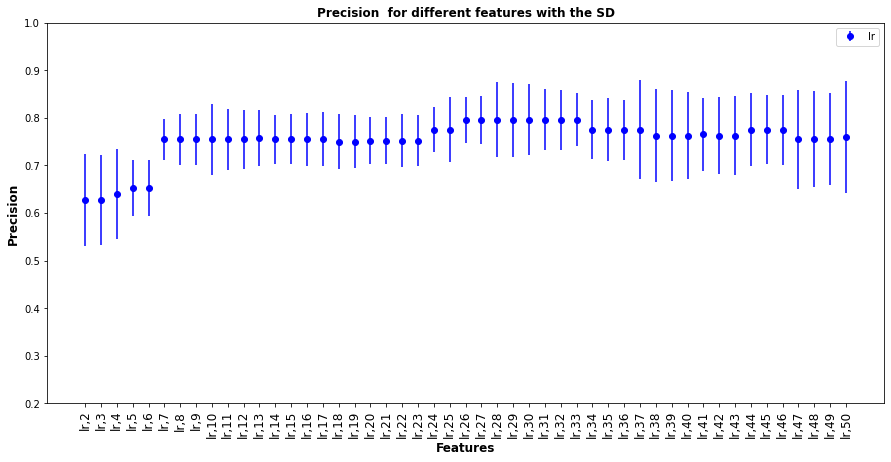

In [26]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  for different features with the SD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-1

space = []
tickFeat = []

for result, model, color in zip(arr_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,49)
    print(a)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1

plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =12)
plt.ylim(.2, 1)
plt.legend()

plt.show()

In [27]:
arr_diff_all = []

for m, m_key in zip (models, ml_dicts.keys()):
    acc_diff_arr = [] 
    sd_diff_arr = [] 
    for f_key in ml_dicts[m_key].keys():
        value = f_key.split(',')
        acc_diff_arr.append( ml_dicts[m_key][f_key][ 'tot_acc' ] - baseDict['lr']['lr, all'][ 'tot_acc' ]  )

        sd_train = jack_SD( baseDict['lr']['lr, all'][ 'jack_train' ], ml_dicts[m_key][f_key]['jack_train'] )[0]
        sd_test = jack_SD(  baseDict['lr']['lr, all'][ 'jack_test' ],  ml_dicts[m_key][f_key]['jack_test']   )[0]

        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_diff_arr.append(sd) # append sd_arr to an array
    arr_diff_all.append([ list(ml_dicts[m_key].keys()), acc_diff_arr, sd_diff_arr]) 

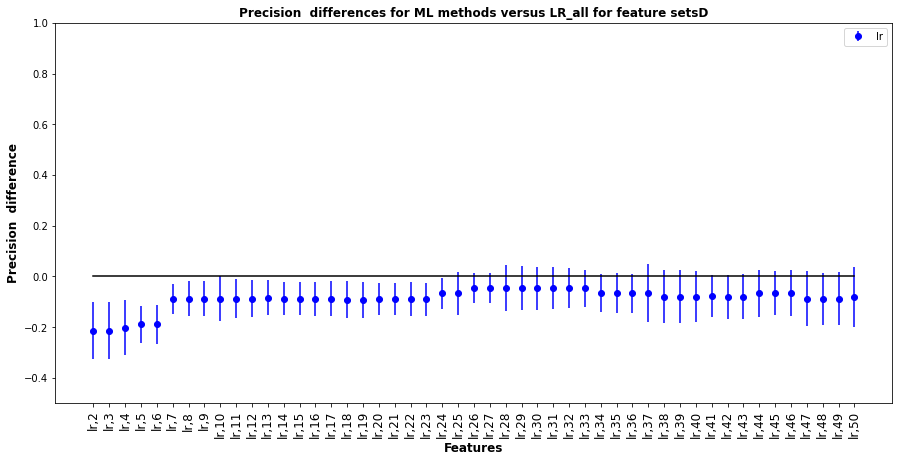

In [28]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  differences for ML methods versus LR_all for feature setsD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision  difference", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-0.5
space = []
tickFeat = []

for result, model, color in zip(arr_diff_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,49)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1
    
plt.plot(np.array(space), np.zeros(49*1), color = 'Black')        
plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =12)
plt.ylim(-.5, 1)
plt.legend()

plt.show()